In [2]:
import pandas as pd
import datetime
import re
import numpy as np
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim.parsing.preprocessing import STOPWORDS


import nltk
from nltk.stem.porter import *
nltk.download('wordnet')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
from nltk.stem import WordNetLemmatizer, SnowballStemmer

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

import pickle

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/niloofar/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
with open('/Users/niloofar/Documents/insight/data/cleaned/hotel2/sentiment_topic_final','rb') as f:
        dT=pickle.load(f,encoding='latin1')

In [8]:
dT1=dT.drop(["sum"],axis=1)
dT1['Reviewer_Score']=[int(i) for i in dT1['Reviewer_Score']]
dT1['Reviewer_Score']=dT1['Reviewer_Score']/10

In [18]:
dT1

,Document_No,amenities,extra_charge,location,parking,staff,Review_Date,Reviewer_Score
0,0,0.0000,0.0,-0.4023,0.0000,0.0000,2020-01-01,1.0
1,1,0.0000,0.0,0.9285,0.0000,0.0000,2019-11-01,5.0
2,2,0.2374,0.0,0.0000,0.0000,0.0000,2020-01-01,3.0
3,3,0.1303,0.0,0.0000,0.0000,0.0000,2020-01-01,5.0
4,4,0.0000,0.0,0.9915,0.0000,0.0000,2020-01-01,5.0
5,5,0.8442,0.0,0.0000,0.0000,0.0000,2020-01-01,2.0
6,6,0.6845,0.0,0.0000,0.0000,0.0000,2020-01-01,2.0
7,7,0.5119,0.0,0.0000,0.0000,0.0000,2020-01-01,1.0
8,8,0.0000,0.0,0.8689,0.0000,0.0000,2020-01-01,5.0
9,9,0.9402,0.0,0.0000,0.0000,0.0000,2020-01-01,3.0


In [3]:
x_column=[i  for i in dT.columns if i not in ["Reviewer_Score","sum","Review_Date","Document_No"]]

x_column

['amenities', 'extra_charge', 'location', 'parking', 'staff']

In [4]:
import datetime
from datetime import date, timedelta

sdate = date(2013, 1, 1)   # start date
edate = date(2020, 1, 1)   # end date
delta = edate - sdate
year=(delta/365).days

Date=[]
for i in range(0,year):
    if i==3:
        pt=sdate + timedelta(days=366)
    else:    
        pt=sdate + timedelta(days=365)
    Date.append([sdate,pt])
    sdate=pt

K=[Date[i][0].year for i in range(0,len(Date))]

In [5]:
len(Date)

7

In [58]:
index=5
df=dT[(dT.Review_Date>=Date[index][0]) & (dT.Review_Date<Date[index][1])]


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning:

Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.



In [59]:
from sklearn.model_selection import train_test_split

y = df.Reviewer_Score
X = pd.DataFrame(df, columns = x_column)
np.random.seed(seed = 42)
# X['random'] = np.random.random(size = len(X))
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.8, random_state = 42)

In [60]:
from sklearn.metrics import r2_score,mean_squared_error
from rfpimp import permutation_importances
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 100,
                           n_jobs = -1,
                           oob_score = True,
                           bootstrap = True,
                           random_state = 42)

rf.fit(X_train, y_train)

def r2(rf, X_train, y_train):
    return r2_score(y_train, rf.predict(X_train))

model=permutation_importances(rf, X_train, y_train, r2)

In [61]:
model1=rf.fit(X_train, y_train)



In [62]:
import lime
import lime.lime_tabular

explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values,
                                                   mode = 'regression',
                                                   feature_names = X_train.columns,
                                                   categorical_features = [8], 
                                                   categorical_names = ['CHAS'], 
                                                   discretize_continuous = True)
                                                   
np.random.seed(42)
# exp = explainer.explain_instance(X_valid.values[100], rf.predict, num_features = len(x_column))
# exp.show_in_notebook(show_all=False) #only the features used in the explanation are displayed

# exp = explainer.explain_instance(X_valid.values[150], rf.predict, num_features = len(x_column))
# exp.show_in_notebook(show_all=True)



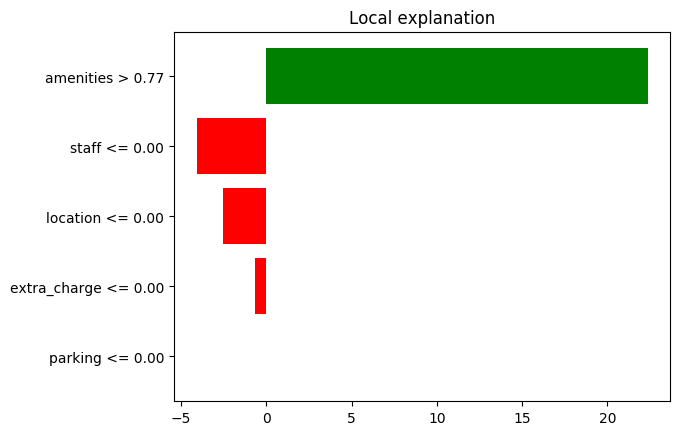

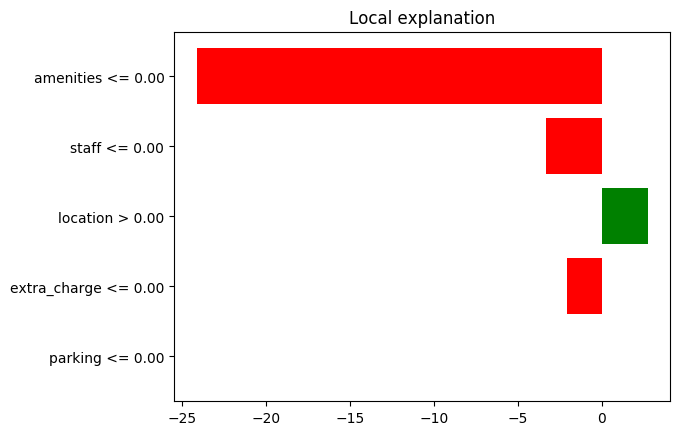

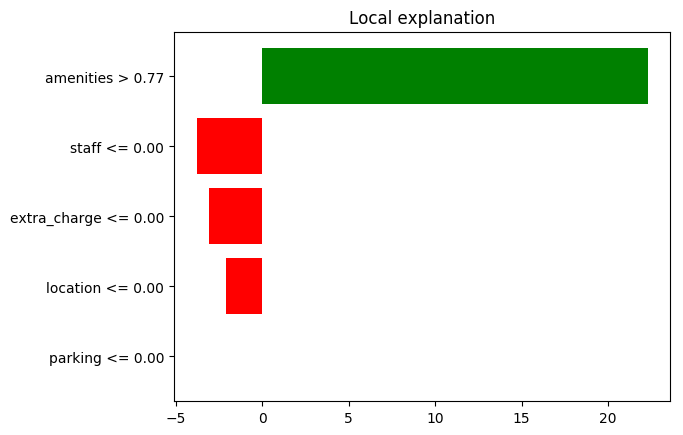

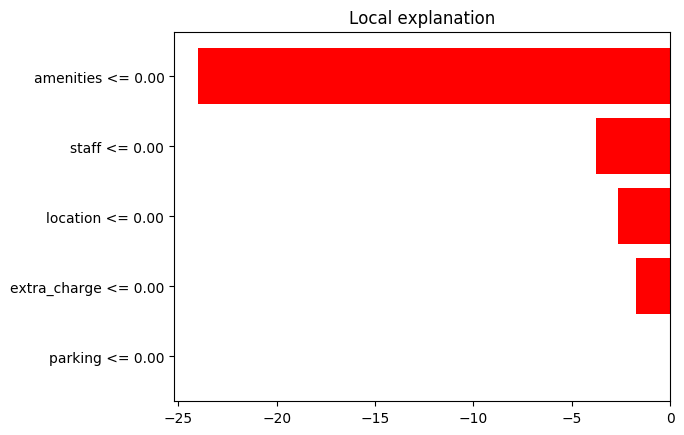

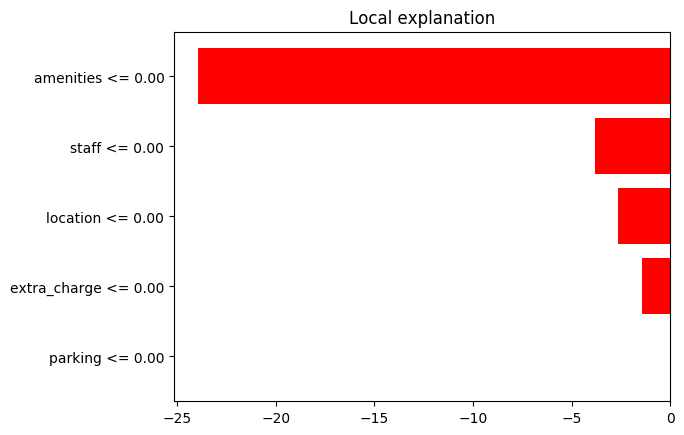

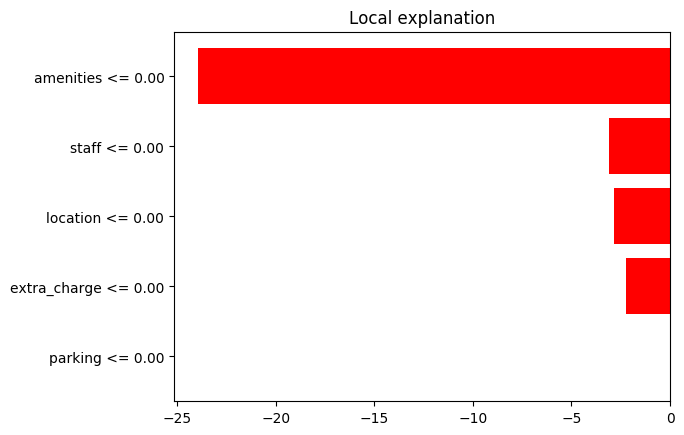

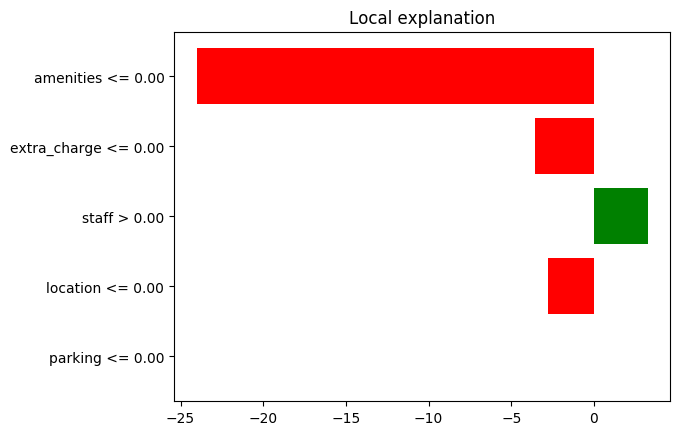

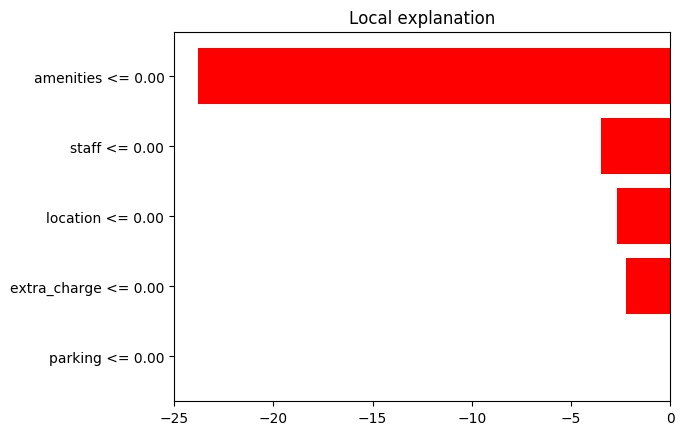

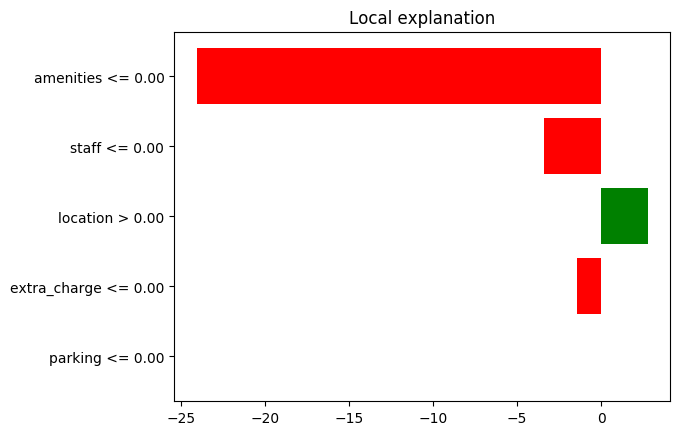

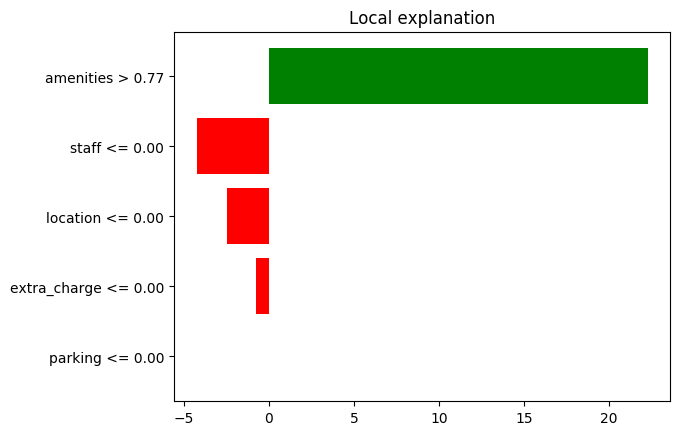

In [63]:
for i in range(0,10):
    
    exp = explainer.explain_instance(X_valid.values[i], rf.predict, num_features = len(x_column))
#     exp.show_in_notebook(show_all=True)

    plt = exp.as_pyplot_figure()
#     plt.tight_layout()
    exp.save_to_file('./explainer{}.html'.format(i))
#     exp.show_in_notebook(show_table=True)


In [64]:
imp_df = pd.DataFrame({'feature': X_train.columns.values,
                       'importance': model1.feature_importances_})

In [65]:
# import imp
# import eli5
# from eli5.sklearn import PermutationImportance

# perm = PermutationImportance(rf, cv = None, refit = False, n_iter = 50).fit(X_train, y_train)
# perm_imp_eli5 = imp_df(X_train.columns, perm.feature_importances_)

In [66]:
model1.feature_importances_

array([0.80796284, 0.01442394, 0.10172866, 0.        , 0.07588456])

In [67]:
from sklearn.base import clone 

def drop_col_feat_imp(model, X_train, y_train, random_state = 42):
    
    # clone the model to have the exact same specification as the one initially trained
    model_clone = clone(model)
    # set random_state for comparability
    model_clone.random_state = random_state
    # training and scoring the benchmark model
    model_clone.fit(X_train, y_train)
    benchmark_score = model_clone.score(X_train, y_train)
    # list for storing feature importances
    importances = []
    
    # iterating over all columns and storing feature importance (difference between benchmark and new model)
    for col in X_train.columns:
        model_clone = clone(model)
        model_clone.random_state = random_state
        model_clone.fit(X_train.drop(col, axis = 1), y_train)
        drop_col_score = model_clone.score(X_train.drop(col, axis = 1), y_train)
        importances.append(benchmark_score - drop_col_score)
    
#     importances_df = imp_df(X_train.columns, importances)
    return importances

In [68]:
# model_clone = clone(model)




importances=drop_col_feat_imp(model1, X_train, y_train, random_state = 42)

In [76]:
importances

[0.6378869768766265,
 0.03156932812718738,
 0.11364415890280655,
 6.375892482135548e-05,
 0.09971031475326797]

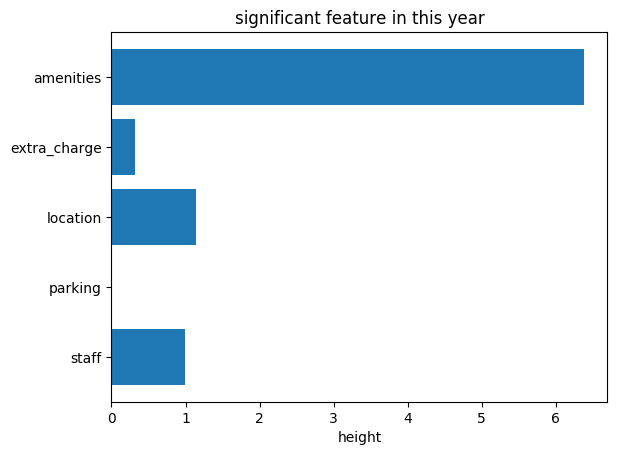

In [69]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
height = [i*10 for i in importances]
bars = imp_df['feature']
y_pos = np.arange(len(bars))


# performance = 3 + 10 * np.random.rand(len(people))
# error = np.random.rand(len(people))

ax.barh(y_pos, height, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(bars)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('height')
ax.set_title('significant feature in this year')
plt.show()

In [70]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV, Ridge
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.linear_model import RidgeCV, Ridge

reg=RidgeCV(alphas=np.arange(0.05,3.01,0.05), scoring='neg_mean_squared_error',cv=None).fit(X_train,y_train)
# ridgeReg=Ridge(alpha=reg.alpha)
# socres=cross_val_score(ridgeReg,X_train,y_train,cv=X_train.shape[0],scoring='neg_mean_squared_error')

In [71]:
ridgeReg = Ridge(alpha = reg.alpha_)
scores = cross_val_score(ridgeReg, X_train, y_train, cv=X_train.shape[0], scoring = 'neg_mean_squared_error')


In [72]:
import plotly
import plotly.graph_objs as go

ridgeReg.fit(X_train, y_train)
features=x_column

index = np.argsort(-ridgeReg.coef_)
# index
ordered = [ features[i] for i in index]

dataBar = [go.Bar(
            x=ordered,
            y=ridgeReg.coef_[index]
    )]

plotly.offline.iplot(dataBar, filename='Ridge regression feature coefficients')

In [73]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV

gbmReg = GradientBoostingRegressor(loss='ls')

# specify parameters and distributions to sample from
param_dist = {"max_depth": range(2,11),
              "n_estimators": np.arange(10, 61, 5),
              "learning_rate": [0.001, 0.01, 0.1, 0.2]}

# run randomized search
n_iter_search = 200
random_search = RandomizedSearchCV(gbmReg, scoring = 'neg_mean_squared_error', param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=X_train.shape[0])

random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=94, error_score='raise-deprecating',
          estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_sampl...=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=200, n_jobs=None,
          param_distributions={'max_depth': range(2, 11), 'n_estimators': array([10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60]), 'learning_rate': [0.001, 0.01, 0.1, 0.2]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='neg_mean_squared_error',
          verbose=0)

In [75]:
gbmReg = GradientBoostingRegressor(loss='ls', max_depth = 4, n_estimators = 45, learning_rate = 0.2)
gbmReg.fit(X_train, y_train)
index = np.argsort(-gbmReg.feature_importances_)

ordered = [ features[i] for i in index]

dataBar = [go.Bar(
            x=ordered,
            y=gbmReg.feature_importances_[index]
    )]

plotly.offline.iplot(dataBar, filename='GBM feature importance')